# [Sutton and Barto Notebooks](https://github.com/seungjaeryanlee/sutton-barto-notebooks): Figure 2.3

[모두AI](https://www.modu.ai)  
Author: Ryan Lee  
저자: 이승재  

![Figure 2.3](figure_2_3.png)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Environment

![Figure 2.1](figure_2_1.png)

In [2]:
class Environment:
    """
    The 10-armed Testbed environment shown in Figure 2.1.
    Figure 2.1에서 보여진 10개의 행동이 가능한 Bandit입니다.
    """
    def __init__(self, n_actions=10):
        self.action_space = [i for i in range(n_actions)]
        self.distributions = []
        for _ in range(n_actions):
            mean = np.random.normal(0, 1)
            stddev = 1
            self.distributions.append((mean, stddev))

        self.optimal_action = np.argmax([d[0] for d in self.distributions])

    def step(self, action):
        """
        Returns the reward of the given action.
        주어진 행동에 대한 보상을 반환합니다.
        """
        mean, stddev = self.distributions[action]
        reward = np.random.normal(loc=mean, scale=stddev)
        return reward

    def reset(self):
        """
        Reset the reward distributions of the environment.
        환경의 보상 분포들을 재설정합니다.
        """
        self.distributions = []
        for _ in range(len(self.action_space)):
            mean = np.random.normal(0, 1)
            stddev = 1
            self.distributions.append((mean, stddev))

        self.optimal_action = np.argmax([d[0] for d in self.distributions])

## Agent

In [3]:
class Agent:
    """
    An e-greedy agent.
    엡실론 탐욕 에이전트입니다.
    """
    def __init__(self, action_space, initial_q=0, epsilon=0, learning_rate=0.9):
        self.action_space = action_space
        self.q = np.full(len(action_space), initial_q)
        self.epsilon = epsilon
        self.learning_rate = learning_rate

    def get_action(self):
        """
        Choose action with epsilon-greedy policy.
        엡실론 탐욕 정책으로 행동을 선택합니다.
        """
        if random.random() < self.epsilon:
            return np.random.choice(self.action_space)
        else:
            return np.argmax(self.q)

    def update_q(self, action, reward):
        """
        Update appropriate Q value with given action and reward.
        주어진 행동과 보상으로 Q값을 업데이트합니다.
        """
        self.q[action] += self.learning_rate * (reward - self.q[action])

    def reset(self):
        """
        Reset agent's Q values to 0.
        에이전트의 Q값들을 0으로 재설정합니다.
        """
        self.q = [0] * np.zeros(len(self.action_space))
        self.sum_rewards = np.zeros(len(self.action_space))
        self.action_counts = np.zeros(len(self.action_space), dtype=int)

## Plots

In [4]:
def run(env, agent, n_steps=1000):
    actions = np.zeros(n_steps, dtype=int)
    rewards = np.zeros(n_steps)
    for i in range(n_steps):
        actions[i] = agent.get_action()
        rewards[i] = env.step(actions[i])
        agent.update_q(actions[i], rewards[i])

    return (actions, rewards)

In [5]:
def runs(env, agent, n_runs=2000, n_steps=1000):
    sum_rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)

    for i in range(n_runs):
        env.reset()
        agent.reset()
        actions, rewards = run(env, agent, n_steps)
        sum_rewards = np.add(sum_rewards, rewards)
        optimal_action_steps = [i for i, action in enumerate(actions) if action == env.optimal_action]
        for step in optimal_action_steps:
            optimal_action_counts[step] += 1

    return np.divide(sum_rewards, n_steps), np.divide(optimal_action_counts, n_runs)

In [6]:
def plot_optimal_action_percent(agent_params, n_runs, n_steps):
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action', rotation='horizontal', ha='right')
    for initial_q, epsilon, learning_rate in agent_params:
        env = Environment()
        agent = Agent(env.action_space, initial_q, epsilon, learning_rate)
        _, optimal_action_percent = runs(env, agent, n_runs, n_steps)
        plt.plot(optimal_action_percent)
    
    legend = ['Q1 = {}, e = {}'.format(initial_q, epsilon) for initial_q, epsilon, _ in agent_params]
    plt.legend(legend)
    plt.show()

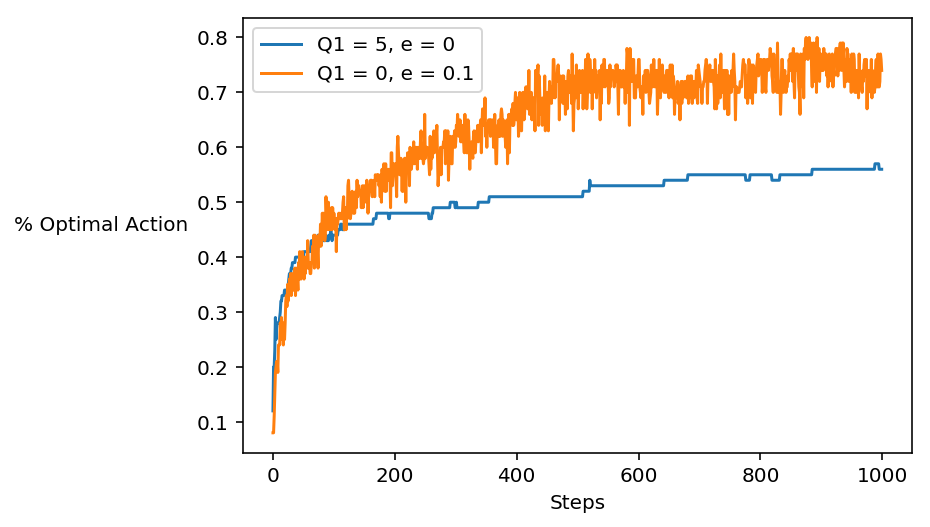

In [7]:
agent_params = [(5, 0, 0.1), (0, 0.1, 0.1)]
plot_optimal_action_percent(agent_params, 100, 1000)